# Tanzania Water well

In [875]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [876]:
X= pd.read_csv('./data/features_training.csv')

X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [877]:
y = pd.read_csv('./data/target_training.csv')

y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [878]:
y['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [879]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Let's combine these two dataframes so if we are dropping any rows, its consistent across our target as well as features.

In [880]:
df = pd.concat([X,y], axis=1,join='outer')

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Let's start exploring the features down the list.

### Dropping irrelevant columns

From the get go, there are columns that will be irrelevant for our model just by its [decription]('feature_info.md'). Let's drop those now to make our dataframe into a more manageable one. 

We will potentially drop more along the way as we explore each features.

#### Helper function to figure out redundancy of columns

In [882]:
def col_redund(col1,col2,df):
    
    print(f'{col1} == {col2}?')
    print((df[col1]==df[col2]).value_counts())
    
    print('------------')
    print(f'{col1}')    
    print(df[col1].value_counts())

    print('------------')
    print(f'{col2}')

    print(df[col2].value_counts())
    
    return df[(df[col1]!=df[col2])][[col1,col2]]
    
    

In [883]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'id', 'status_group'],
      dtype='object')

In [884]:
col_redund('extraction_type_class','extraction_type_group',df)

extraction_type_class == extraction_type_group?
True     39957
False    19443
dtype: int64
------------
extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64
------------
extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64


,extraction_type_class,extraction_type_group
6,handpump,swn 80
7,handpump,nira/tanira
8,handpump,india mark ii
9,handpump,nira/tanira
11,handpump,swn 80
...,...,...
59389,handpump,india mark ii
59390,handpump,swn 80
59397,handpump,swn 80
59398,handpump,nira/tanira


In [885]:
col_redund('extraction_type','extraction_type_group',df)

extraction_type == extraction_type_group?
True     56931
False     2469
dtype: int64
------------
extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64
------------
extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev   

,extraction_type,extraction_type_group
31,ksb,submersible
45,windmill,wind-powered
66,other - rope pump,rope pump
88,ksb,submersible
92,ksb,submersible
...,...,...
59293,other - rope pump,rope pump
59309,ksb,submersible
59325,ksb,submersible
59354,ksb,submersible


`extraction_type_group` and `extraction_type` are the specific brand of extraction type class used. Let's keep it simple and keep `extraction_type_class`. Brand of handpump is not our main concern in predicting whether a well is functional or not, since some of the handpumps have unknown brand. So its better to keep it consistent. 

In [886]:
col_redund('water_quality', 'quality_group',df)

water_quality == quality_group?
False    51664
True      7736
dtype: int64
------------
water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64
------------
quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59393,soft,good
59394,soft,good
59395,soft,good
59396,soft,good


`water_quality` and `quality_group` are also almost similar with `water_quality` being more describing *good* water quality as *soft* and further specifying *salty abandoned* and *fluoride abandoned*. Let's keep the categorization simple, drop `water_quality`, and use `quality_group` while changing *good* to *soft*. 

In [887]:
#Change good to soft

mask = df['quality_group']=='good'

df.loc[mask,'quality_group'] = 'soft'

In [888]:
col_redund('quantity', 'quantity_group',df)

quantity == quantity_group?
True    59400
dtype: int64
------------
quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64
------------
quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


,quantity,quantity_group


`quantity` and `quantity_group` are wholly similar. So we can drop either one.

In [889]:
col_redund('management', 'management_group',df)

management == management_group?
False    56227
True      3173
dtype: int64
------------
management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64
------------
management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
5,vwc,user-group
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


Similar to our other columns, one of these two are just further breakdown of the other. Let's keep our categorization broad and keep `management_group`.

In [890]:
col_redund('scheme_management', 'scheme_name',df)

scheme_management == scheme_name?
False    59400
dtype: int64
------------
scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64
------------
scheme_name
K                            682
None                         644
Borehole                     546
Chalinze wate                405
M                            400
                            ... 
Kisamisi water scheme          1
Kisogwe                        1
Mradi wa maji wa Kiloleni      1
magoto piped Water suplly      1
Misambo mlimani                1
Name: scheme_name, Length: 2696, dtype: int64


,scheme_management,scheme_name
0,VWC,Roman
1,Other,NaN
2,VWC,Nyumba ya mungu pipe scheme
3,VWC,NaN
4,NaN,NaN
...,...,...
59395,Water Board,Losaa Kia water supply
59396,VWC,Ikondo electrical water sch
59397,VWC,NaN
59398,VWC,NaN


These two columns tells us who operates the waterpoint. One is speficies the specific entity. We don't need that much detail for our model. So let's keep `scheme_management`. We're already seeing ***NaNs*** in this column. Which we will deal with later.

In [891]:
col_redund('payment', 'payment_type',df)

payment == payment_type?
True     34559
False    24841
dtype: int64
------------
payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
------------
payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


,payment,payment_type
0,pay annually,annually
2,pay per bucket,per bucket
5,pay per bucket,per bucket
11,pay when scheme fails,on failure
13,pay monthly,monthly
...,...,...
59394,pay monthly,monthly
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly


`payment` and `payment_type` are also similar. They just have different naming conventions. We can keep either one. So we'll keep `payment_type`.

In [892]:
col_redund('source_type', 'source_class',df)

source_type == source_class?
False    59400
dtype: int64
------------
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
------------
source_class
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


,source_type,source_class
0,spring,groundwater
1,rainwater harvesting,surface
2,dam,surface
3,borehole,groundwater
4,rainwater harvesting,surface
...,...,...
59395,spring,groundwater
59396,river/lake,surface
59397,borehole,groundwater
59398,shallow well,groundwater


In [893]:
col_redund('source', 'source_type',df)

source == source_type?
True     37008
False    22392
dtype: int64
------------
source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
------------
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


,source,source_type
3,machine dbh,borehole
6,machine dbh,borehole
8,machine dbh,borehole
10,machine dbh,borehole
15,machine dbh,borehole
...,...,...
59390,machine dbh,borehole
59391,river,river/lake
59394,machine dbh,borehole
59396,river,river/lake


I think for these 3, we can keep 2 `source_class` and `source_type`.

In [894]:
col_redund('waterpoint_type', 'waterpoint_type_group',df)

waterpoint_type == waterpoint_type_group?
True     53297
False     6103
dtype: int64
------------
waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
------------
waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


,waterpoint_type,waterpoint_type_group
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
5,communal standpipe multiple,communal standpipe
53,communal standpipe multiple,communal standpipe
55,communal standpipe multiple,communal standpipe
...,...,...
59337,communal standpipe multiple,communal standpipe
59345,communal standpipe multiple,communal standpipe
59349,communal standpipe multiple,communal standpipe
59356,communal standpipe multiple,communal standpipe


We're not quite sure what *communal standpipe multiple* is so lets just let it be categorized as *communal standpipe* as in `waterpoint_type_group`. We'll drop `waterpoint_type`.

In [895]:
col_redund('region', 'region_code',df)

region == region_code?
False    59400
dtype: int64
------------
region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64
------------
region_code
11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64


,region,region_code
0,Iringa,11
1,Mara,20
2,Manyara,21
3,Mtwara,90
4,Kagera,18
...,...,...
59395,Kilimanjaro,3
59396,Iringa,11
59397,Mbeya,12
59398,Dodoma,1


In [896]:
len(df['region'].unique())

21

In [897]:
df['region'].isna().sum().sum()

0

In [898]:
len(df['region_code'].unique())

27

In [899]:
df['region_code'].isna().sum().sum()

0

In [900]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

These two are supposed to map to each other. But there's more region code than there is the number of regions, so there might be more region code in a region. Both of these columns don't have nulls. I'm going to use `region` over `region_code`.

In [901]:
col_drop = ['wpt_name','payment','num_private','extraction_type_group','water_quality','quantity_group','management','scheme_name',\
           'extraction_type','source','waterpoint_type','recorded_by']


We will update `col_drop` as we go.

In [902]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Check for duplicates.

Water well ID should be unique to each water well. So we'll use that to check for duplicates.

In [903]:
df[df['id'].duplicated()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group


Oh wow! How awesome there are no duplicates? What if we look at the latitude and longitude? 2 different wells can't be in the same spot.

In [904]:
df['coord'] = list(zip(df['latitude'],df['longitude']))

In [905]:
df['coord'].duplicated().value_counts(normalize=True)

False    0.96835
True     0.03165
Name: coord, dtype: float64

In [906]:
df['coord'].value_counts()[df['coord'].value_counts()>1]

(-2e-08, 0.0)                         1812
(-2.49032384, 32.98767048)               2
(-6.98945622, 39.09348389)               2
(-2.51532072, 32.9780624)                2
(-1.7933419999999998, 31.61952953)       2
                                      ... 
(-7.06537264, 37.33981057)               2
(-7.05692253, 37.37401655)               2
(-7.10462503, 37.25011096)               2
(-7.05637235, 37.37571687)               2
(-6.98584173, 39.08618257)               2
Name: coord, Length: 70, dtype: int64

Hm, so there are 1880 records of water wells that are on the same exact coordinates. Let's look at these.

So for those that are duplicates, the longitude and latitude themselves are erroneous. And there are some that are actually duplicates of each other but have unique IDs.

In [907]:
pd.set_option('display.max_columns', None)

df[(df['coord']==(-6.98584173, 39.08618257))]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,coord
5395,22,50.0,2013-03-16,NaN,76,NaN,39.086183,-6.985842,Kwa Konde,0,Wami / Ruvu,Mtaa Wa Tungini,Dar es Salaam,7,2,Ilala,Chanika,250,NaN,GeoData Consultants Ltd,Private operator,NaN,NaN,2010,other,other,other,private operator,commercial,pay per bucket,per bucket,salty abandoned,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,22,functional,"(-6.98584173, 39.08618257)"
50959,63064,50.0,2013-03-16,0,76,0,39.086183,-6.985842,Kwa Konde,0,Wami / Ruvu,Mtaa Wa Tungini,Dar es Salaam,7,2,Ilala,Chanika,250,NaN,GeoData Consultants Ltd,Private operator,NaN,False,2010,other,other,other,private operator,commercial,pay per bucket,per bucket,salty abandoned,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,63064,functional,"(-6.98584173, 39.08618257)"


We're only going to keep the first occurence of the duplicates and get rid of rows with erroneous coords.


We're also rounding up `latitude` and `longitude` to 2 decimal places so its rounded to the nearest ~2km.

In [908]:
# Remove rows with erroneous values.

mask = df['coord'] != (-2e-08, 0.0) 

df = df[mask]

#Drop duplicates
df = df.drop_duplicates('coord',keep = 'first')

In [909]:
#Round up l

df['latitude'] = round(df['latitude'],2)
df['longitude'] = round(df['longitude'],2)

## Nulls

Dealing with null values now.

In [910]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3609
gps_height                   0
installer                 3623
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2950
recorded_by                  0
scheme_management         3750
scheme_name              26632
permit                    3043
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [911]:
(df == 0).sum()

id                           1
amount_tsh               39773
date_recorded                0
funder                       0
gps_height               18612
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private              56762
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code               23
lga                          0
ward                         0
population               19555
public_meeting            4868
recorded_by                  0
scheme_management            0
scheme_name                  0
permit                   16421
construction_year        18880
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

There's so many zeros? Let's replace the zeros with NaNs (except for `amount_tsh`, since zero is a legit value for that column) and visualize them with missingno heatmap and matrix plot.

In [912]:
# Create new dataframe with zeros as NaNs
null_df = df.replace(0,np.NaN)
null_df.loc[null_df['amount_tsh'].isna(), 'amount_tsh'] = 0
null_df.isna().sum()

id                           1
amount_tsh                   0
date_recorded                0
funder                    3609
gps_height               18612
installer                 3623
longitude                    0
latitude                     0
wpt_name                     0
num_private              56762
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code               23
lga                          0
ward                         0
population               19555
public_meeting            7818
recorded_by                  0
scheme_management         3750
scheme_name              26632
permit                   19464
construction_year        18880
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [913]:
df['construction_year'].isna().sum()/len(df)

0.0

<AxesSubplot:>

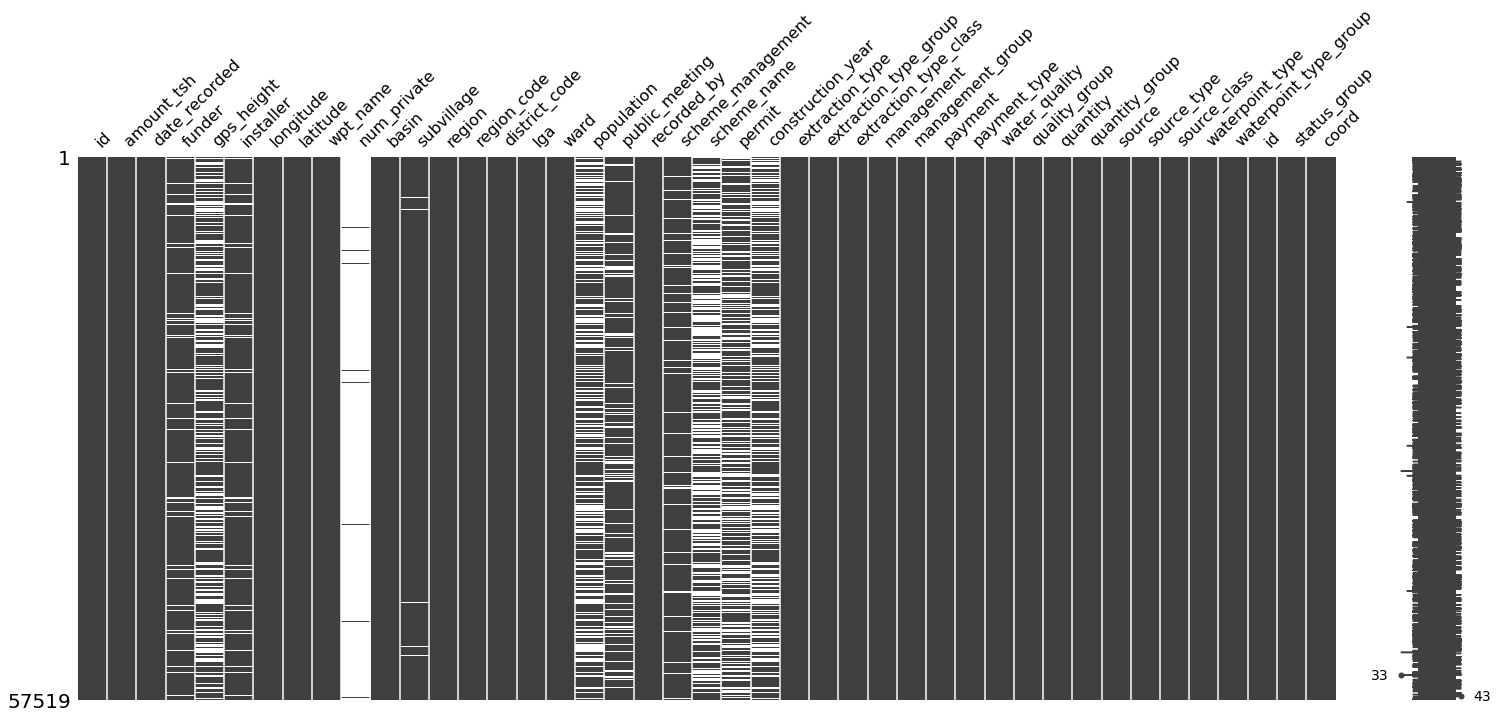

In [914]:
import missingno as msno

msno.matrix(null_df)

We can see that `gps_height`, `population`, `permit` and `construction_year` seem to have correlation in missing values. Let's look at the missingno heat map.

<AxesSubplot:>

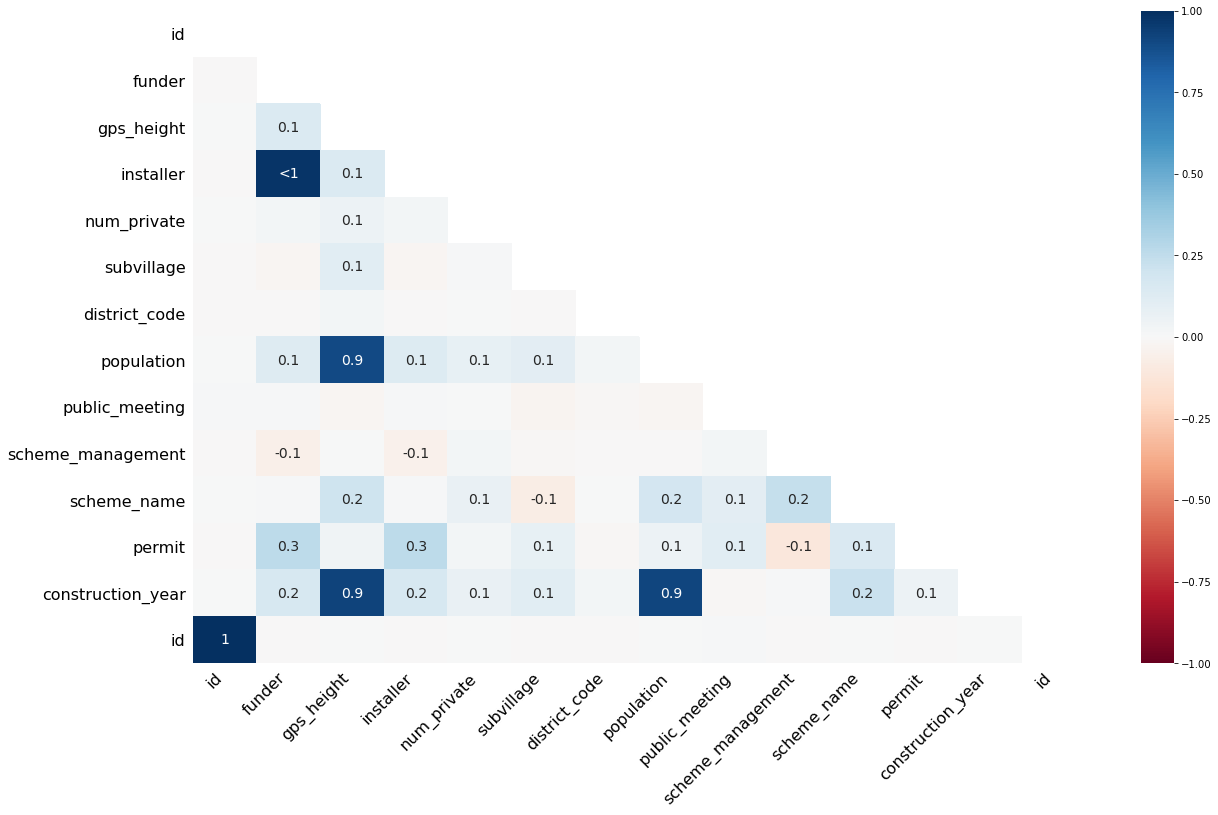

In [915]:
msno.heatmap(null_df)

Oh my ! The missing values between `gps_height`, `population`, and `construction_year` are indeed highly correlated. I think the best way to go about this is doing a MissingIndicator method when we build our model. So let's go ahead and turn zeros into NaNs in our actual dataframe.

In [916]:
#Replace zeros to NaNs

df['gps_height']=df['gps_height'].replace(0,np.NaN)
df['population']=df['population'].replace(0,np.NaN)
df['population']=df['population'].replace(1,np.NaN)
df['construction_year']=df['construction_year'].replace(0,np.NaN)

Just out of curiosity, now that we've replace zeros in those 3 columns with NaNs, what does their distribution look like?

#### GPS Height

<AxesSubplot:xlabel='gps_height', ylabel='Count'>

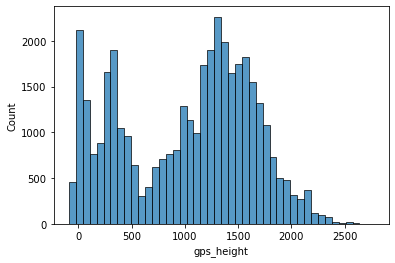

In [917]:
sns.histplot(df['gps_height'])

The GPS Height distribution looks good. I'm just going to impute the GPS height with the mean value when we build our model.

<AxesSubplot:xlabel='construction_year', ylabel='Count'>

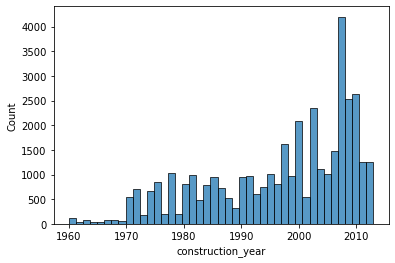

In [918]:
sns.histplot(df['construction_year'])

Since year is a discrete value, I think it's best if we calculate the age of the well at the time of record and use this instead in our model

In [919]:
df['age_well'] = (pd.to_datetime(df['date_recorded'],yearfirst=True).dt.year)-df['construction_year']

In [920]:
df['age_well']

0        12.0
1         3.0
2         4.0
3        27.0
4         NaN
         ... 
59395    14.0
59396    15.0
59397     NaN
59398     NaN
59399     9.0
Name: age_well, Length: 57519, dtype: float64

C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hanis\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.000e+00, 9.640e+03, 7.606e+03, 6.746e+03, 3.593e+03, 3.803e+03,
        3.106e+03, 2.749e+03, 1.092e+03, 2.960e+02]),
 array([-7., -1.,  5., 11., 17., 23., 29., 35., 41., 47., 53.]),
 <BarContainer object of 10 artists>)

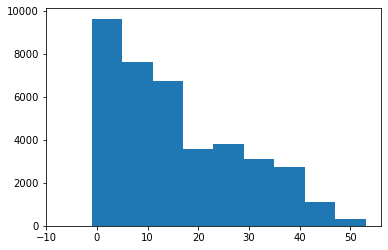

In [921]:
plt.hist(df['age_well'])

<AxesSubplot:xlabel='population', ylabel='Count'>

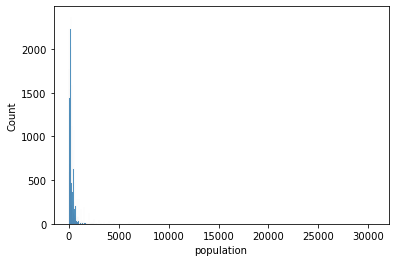

In [922]:
sns.histplot(df['population'])

In [923]:
df['population'].describe()

count    30952.000000
mean       344.426790
std        607.417289
min          2.000000
25%         99.000000
50%        200.000000
75%        380.000000
max      30500.000000
Name: population, dtype: float64

In [924]:
df.population.mode()

0    200.0
dtype: float64

That's a wide range of population there. We might have to log transform this feature for our model. We'll circle back to this later.

#### Amount TSH

This feature describes the amount water available to waterpoint.

In [925]:
df['amount_tsh'].describe()

count     57519.000000
mean        327.987845
std        3045.634938
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [926]:
df['amount_tsh'].value_counts(normalize=True)

0.0         0.691476
500.0       0.053930
50.0        0.042838
1000.0      0.025835
20.0        0.025435
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

<AxesSubplot:xlabel='amount_tsh'>

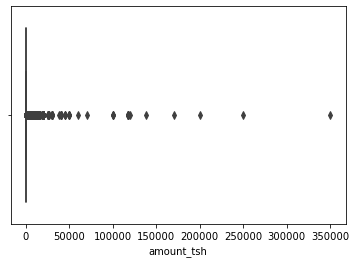

In [927]:
sns.boxplot(x=df['amount_tsh'])

In [928]:
df[df['amount_tsh']<50000]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,coord,age_well
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,soft,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,"(-9.85632177, 34.93809275)",12.0
1,8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,soft,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,"(-2.14746569, 34.6987661)",3.0
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,soft,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,"(-3.82132853, 37.46066446)",4.0
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,soft,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,"(-11.15529772, 38.48616088)",27.0
4,19728,0.0,2011-07-13,Action In A,NaN,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,soft,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,"(-1.82535885, 31.13084671)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.17,-3.25,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125.0,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999.0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,soft,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,functional,"(-3.25384746, 37.16980689)",14.0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.25,-9.07,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56.0,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,soft,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,functional,"(-9.0706288, 35.24999126)",15.0
59397,37057,0.0,2011-04-11,NaN,NaN,NaN,34.02,-8.75,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,NaN,True,GeoData Consultants Ltd,VWC,NaN,False,NaN,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,functional,"(-8.75043433, 34.01708706)",NaN
59398,31282,0.0,2011-03-08,Malec,NaN,Musa,35.86,-6.38,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,NaN,T

<AxesSubplot:xlabel='amount_tsh'>

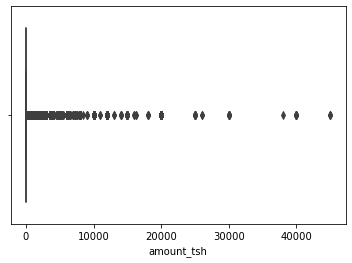

In [929]:
sns.boxplot(x=df[df['amount_tsh']<50000]['amount_tsh'])

Seems like 70% of our data on amount water available to waterpoint is 0. Let's make a new column labeling whether `amount_ths` is 0 or not and remove the outliers, because 20000 meters is taller than the stratosphere.

In [930]:
df = df[df['amount_tsh']<20000]

In [955]:
df['amount_ths_zero'] = df['amount_tsh']==0
df['amount_ths_zero']=df['amount_ths_zero'].astype(int)

In [932]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57422 entries, 0 to 59399
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57422 non-null  int64  
 1   amount_tsh             57422 non-null  float64
 2   date_recorded          57422 non-null  object 
 3   funder                 53817 non-null  object 
 4   gps_height             38810 non-null  float64
 5   installer              53803 non-null  object 
 6   longitude              57422 non-null  float64
 7   latitude               57422 non-null  float64
 8   wpt_name               57422 non-null  object 
 9   num_private            57422 non-null  int64  
 10  basin                  57422 non-null  object 
 11  subvillage             57051 non-null  object 
 12  region                 57422 non-null  object 
 13  region_code            57422 non-null  int64  
 14  district_code          57422 non-null  int64  
 15  lg

#### Funder

There's 1900 unique funders. Need to figure out how to consolidate this, if possible. Let's keep the first top 25 funders and recategorize the rest as others.

In [933]:
df['funder'].value_counts()[:41]

Government Of Tanzania            8829
Danida                            3111
Hesawa                            1914
World Bank                        1345
Kkkt                              1287
World Vision                      1224
Rwssp                             1187
Unicef                            1035
District Council                   843
Tasaf                              834
Dhv                                829
Private Individual                 824
Norad                              765
0                                  762
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  587
Water                              583
Dwe                                484
Netherlands                        461
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water                         393
Dwsp                     

In [934]:
funders_list=list(df['funder'].value_counts()[:41].index)
funders_list.remove('0')
funders_list

df['funder']=df['funder'].map(lambda x: x if x in funders_list else 'Other')


df['funder'].value_counts()

Other                             23316
Government Of Tanzania             8829
Danida                             3111
Hesawa                             1914
World Bank                         1345
Kkkt                               1287
World Vision                       1224
Rwssp                              1187
Unicef                             1035
District Council                    843
Tasaf                               834
Dhv                                 829
Private Individual                  824
Norad                               765
Germany Republi                     610
Tcrs                                602
Ministry Of Water                   587
Water                               583
Dwe                                 484
Netherlands                         461
Hifab                               450
Adb                                 448
Lga                                 442
Amref                               425
Fini Water                          393


#### Installer

In [935]:
df['installer'].value_counts()[:41]

DWE                           16205
Government                     1668
RWE                            1167
Commu                          1060
DANIDA                         1049
KKKT                            897
Hesawa                          803
0                               762
TCRS                            707
Central government              619
CES                             610
DANID                           552
District Council                551
Community                       539
HESAWA                          537
World vision                    408
LGA                             408
WEDECO                          397
District council                392
Gover                           383
TASAF                           377
AMREF                           329
TWESA                           316
WU                              297
Dmdd                            286
ACRA                            277
SEMA                            249
World Vision                

In [936]:
inst_dict = {'Commu':'Community', 'DANID':'DANIDA', 'Central government':'Government', 'HESAWA':'Hesawa',\
             'District council':'District Council'}

df['installer'] = df['installer'].replace(inst_dict)

In [937]:
df['installer'].value_counts()[:41]

DWE                           16205
Government                     2287
DANIDA                         1601
Community                      1599
Hesawa                         1340
RWE                            1167
District Council                943
KKKT                            897
0                               762
TCRS                            707
CES                             610
World vision                    408
LGA                             408
WEDECO                          397
Gover                           383
TASAF                           377
AMREF                           329
TWESA                           316
WU                              297
Dmdd                            286
ACRA                            277
SEMA                            249
World Vision                    248
DW                              246
OXFAM                           233
Gove                            222
Idara ya maji                   222
UNICEF                      

In [938]:
installer_list=list(df['installer'].value_counts()[:41].index)
installer_list

df['installer']=df['installer'].map(lambda x: x if x in installer_list else 'Other')


df['installer'].value_counts()

Other                         21649
DWE                           16205
Government                     2287
DANIDA                         1601
Community                      1599
Hesawa                         1340
RWE                            1167
District Council                943
KKKT                            897
0                               762
TCRS                            707
CES                             610
LGA                             408
World vision                    408
WEDECO                          397
Gover                           383
TASAF                           377
AMREF                           329
TWESA                           316
WU                              297
Dmdd                            286
ACRA                            277
SEMA                            249
World Vision                    248
DW                              246
OXFAM                           233
Gove                            222
UNICEF                      

#### Subvillage

This feature has 19287 unique values. This is gonna blow up our model and make it overfit. Since we have other spatial data, I will be dropping this.

In [939]:
df['subvillage'].value_counts()

Shuleni        491
Majengo        489
Madukani       433
Kati           364
Mtakuja        257
              ... 
Uhepere          1
Ifubyanzige      1
Kibalawala       1
Chamgoe          1
Mamba E          1
Name: subvillage, Length: 18558, dtype: int64

In [940]:
col_drop.append('subvillage')

#### Ward

In [941]:
df['ward'].value_counts()

Igosi          307
Imalinyi       242
Siha Kati      232
Mdandu         226
Nduruma        217
              ... 
Machinjioni      1
Nsemulwa         1
Ifinga           1
Simbay           1
Kinungu          1
Name: ward, Length: 2033, dtype: int64

ugh, there's 2000 wards. For the sake of our model where this might result in overfitting, let's get rid of this feature for our model and we'll stick with region as our spatial data for our model.

In [942]:
col_drop.append('ward')

#### lga

In [943]:
len(df['lga'].unique())

124

`lga` has a reasonable number of unique values that hopefully won't cause ovefitting in our model, so let's keep this one.

#### Permit

In [944]:
df['permit'].isna().sum()/len(df)

0.05295879628017136

This is about 5% of our data. We'll impute this using KNNI.

#### Geo code

In [945]:
df['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

In [946]:
df['region_code'].unique()

array([11, 20, 21, 90, 18,  4, 17, 14, 60, 10,  3, 15, 19, 16, 80,  1,  6,
        2, 12, 13,  5,  7, 99, 24,  9,  8, 40], dtype=int64)

Let's combine these 2 as one column `district-code`.

In [947]:
df['district-region'] = [f'{x}-{y}' for x,y in zip(df['district_code'],df['region_code'])]

df['district-region'].value_counts()

4-11     2455
3-17     1401
4-3      1225
2-2      1171
2-16     1158
         ... 
6-6        26
0-1        23
80-17      12
67-60       6
43-40       1
Name: district-region, Length: 129, dtype: int64

In [948]:
#Add irrelevant columns to col_drop list

col_drop.append('region_code')
col_drop.append('district_code')

## Dropping irrelevant features

There's a couple of features here that I don't think will be very informational for our model building. 

In [949]:
col_drop

['wpt_name',
 'payment',
 'num_private',
 'extraction_type_group',
 'water_quality',
 'quantity_group',
 'management',
 'scheme_name',
 'extraction_type',
 'source',
 'waterpoint_type',
 'recorded_by',
 'subvillage',
 'ward',
 'region_code',
 'district_code']

In [950]:
df.reset_index().drop('index',axis=1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,coord,age_well,amount_ths_zero,district-region
0,69572,6000.0,2011-03-14,Roman,1390.0,Other,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,soft,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,"(-9.85632177, 34.93809275)",12.0,False,5-11
1,8776,0.0,2013-03-06,Other,1399.0,Other,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,soft,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,"(-2.14746569, 34.6987661)",3.0,True,2-20
2,34310,25.0,2013-02-25,Other,686.0,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,soft,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,"(-3.82132853, 37.46066446)",4.0,False,4-21
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,soft,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,"(-11.15529772, 38.48616088)",27.0,True,63-90
4,19728,0.0,2011-07-13,Other,NaN,Other,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,soft,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,"(-1.82535885, 31.13084671)",NaN,True,1-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57417,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.17,-3.25,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125.0,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999.0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,soft,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,functional,"(-3.25384746, 37.16980689)",14.0,False,5-3
57418,27263,4700.0,2011-05-07,Other,1212.0,Other,35.25,-9.07,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56.0,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,soft,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,functional,"(-9.0706288, 35.24999126)",15.0,False,4-11
57419,37057,0.0,2011-04-11,Other,NaN,Other,34.02,-8.75,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,NaN,True,GeoData Consultants Ltd,VWC,NaN,False,NaN,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,functional,"(-8.75043433, 34.01708706)",NaN,True,7-12
57420,31282

In [951]:
df['basin'].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

#### Turn our target into binary classification

In [952]:
df['status_group']= [x if x == 'functional' else 'Needs Repairs' for x in df['status_group']]

In [953]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group,coord,age_well,amount_ths_zero,district-region
0,69572,6000.0,2011-03-14,Roman,1390.0,Other,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,soft,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,"(-9.85632177, 34.93809275)",12.0,False,5-11
1,8776,0.0,2013-03-06,Other,1399.0,Other,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,soft,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,"(-2.14746569, 34.6987661)",3.0,True,2-20
2,34310,25.0,2013-02-25,Other,686.0,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,soft,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,"(-3.82132853, 37.46066446)",4.0,False,4-21
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,soft,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,Needs Repairs,"(-11.15529772, 38.48616088)",27.0,True,63-90
4,19728,0.0,2011-07-13,Other,NaN,Other,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,soft,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,"(-1.82535885, 31.13084671)",NaN,True,1-18


In [956]:
pd.DataFrame.to_csv(df,'data/processed.csv')